(500, 2)
(500,)


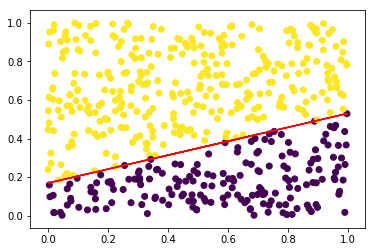

In [114]:
import numpy as np
N = 500
xn = np.asarray(np.random.rand(N, 2), np.float)
a = np.random.rand()
b = np.random.rand()
f = lambda x: a*x+b
yn = np.zeros(N)
for i in range(N):
    if xn[i,1] > f(xn[i,0]):
        yn[i] = 1
fxn = [f(x) for x in xn[:,0]]
print(xn.shape)
print(yn.shape)
import matplotlib.pyplot as plt
x, y = np.transpose(xn)
c = yn
plt.scatter(x, y, c=c)
plt.plot(xn[:,0], fxn, 'r-')

In [123]:
from keras.models import Sequential
from keras.layers import Dense
x_train = xn
y_train = yn
model = Sequential()
model.add(Dense(2, input_shape=(2,), activation='relu', name='layer0'))
model.add(Dense(4, activation='relu', name='layer3'))
model.add(Dense(8, activation='relu', name='layer1'))
model.add(Dense(2, activation='softmax', name='layer2'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=8
          )

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer0 (Dense)               (None, 2)                 6         
_________________________________________________________________
layer3 (Dense)               (None, 4)                 12        
_________________________________________________________________
layer1 (Dense)               (None, 8)                 40        
_________________________________________________________________
layer2 (Dense)               (None, 2)                 18        
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


ValueError: Error when checking target: expected layer2 to have shape (2,) but got array with shape (1,)

500/500 [==============================] - 0s 122us/step


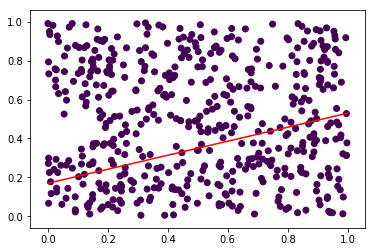

In [119]:
res = model.evaluate(x_train, y_train)
xn2 = np.asarray(np.random.rand(N, 2), np.float)
x2, y2 = np.transpose(xn2)
pred = model.predict(xn)
pred = pred.reshape(-1)
c = np.zeros(N,)
for i in range(N):
    if pred[i] > 0.5:
        c[i] = 1
plt.scatter(x2, y2, c=c)
xl = np.linspace(0, 1, 500)
fl = [f(x) for x in xl]
plt.plot(xl, fl, 'r-')


In [78]:
layer_weight = model.get_layer('layer1').get_weights()
print(layer_weight[1].shape)


(16,)
